# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = pd.read_csv("../output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
output_data_file.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_count=0
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
lat=[]
lng=[]
country=[]
date=[]
city_list=[]

#Pull from API using the imperial units so temperature will be in Fahrenheit

for each_city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + each_city+"&units=imperial"
        weather_response = requests.get(query_url).json()
        city_count=city_count+1
        city_list.append(each_city)
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        print(f"Processing Record {city_count}|{each_city}.")
    except:
        print('City not found. Skipping...')


Processing Record 1|rocha.
Processing Record 2|iqaluit.
Processing Record 3|vaini.
Processing Record 4|albany.
Processing Record 5|norman wells.
Processing Record 6|korla.
Processing Record 7|butaritari.
Processing Record 8|mataura.
Processing Record 9|nikolskoye.
Processing Record 10|puerto ayora.
Processing Record 11|cape town.
Processing Record 12|ilulissat.
Processing Record 13|campoverde.
Processing Record 14|port alfred.
Processing Record 15|talnakh.
Processing Record 16|new norfolk.
Processing Record 17|pisco.
Processing Record 18|pemangkat.
Processing Record 19|punta arenas.
Processing Record 20|kodiak.
Processing Record 21|hofn.
Processing Record 22|isangel.
Processing Record 23|waddan.
Processing Record 24|bethel.
Processing Record 25|saint-philippe.
Processing Record 26|rikitea.
Processing Record 27|tiksi.
Processing Record 28|jaboticabal.
Processing Record 29|ushuaia.
Processing Record 30|clyde river.
Processing Record 31|tuktoyaktuk.
Processing Record 32|esperance.
City no

Processing Record 261|severo-yeniseyskiy.
Processing Record 262|kapuskasing.
City not found. Skipping...
Processing Record 264|geraldton.
Processing Record 265|sausar.
Processing Record 266|manono.
Processing Record 267|nanortalik.
Processing Record 268|ngunguru.
Processing Record 269|sitka.
Processing Record 270|sorland.
Processing Record 271|okha.
Processing Record 272|east london.
Processing Record 273|otradnoye.
Processing Record 274|dong hoi.
Processing Record 275|horsham.
Processing Record 276|caravelas.
Processing Record 277|accra.
Processing Record 278|wenzhou.
Processing Record 279|kamenskiy.
Processing Record 280|yatou.
Processing Record 281|livingstonia.
Processing Record 282|sioux lookout.
Processing Record 283|mar del plata.
Processing Record 284|grindavik.
City not found. Skipping...
Processing Record 286|sibolga.
Processing Record 287|itamaraca.
Processing Record 288|beira.
Processing Record 289|katsuura.
Processing Record 290|san cristobal.
Processing Record 291|bani.
P

Processing Record 516|kirakira.
Processing Record 517|akodia.
Processing Record 518|camacha.
City not found. Skipping...
Processing Record 520|tucuman.
Processing Record 521|herat.
Processing Record 522|chililabombwe.
Processing Record 523|manta.
Processing Record 524|karpogory.
Processing Record 525|altamont.
Processing Record 526|ushtobe.
Processing Record 527|alta floresta.
Processing Record 528|savannah bight.
Processing Record 529|mari-turek.
Processing Record 530|yaan.
Processing Record 531|houma.
Processing Record 532|stornoway.
Processing Record 533|benjamin constant.
Processing Record 534|kashi.
Processing Record 535|dosso.
Processing Record 536|tarko-sale.
Processing Record 537|waingapu.
Processing Record 538|wasilla.
Processing Record 539|guira de melena.
Processing Record 540|liaozhong.
Processing Record 541|lompoc.
Processing Record 542|annecy-le-vieux.
Processing Record 543|mumford.
Processing Record 544|hami.
Processing Record 545|belmonte.
Processing Record 546|salalah.

In [39]:
weather_dict={"City": city_list,
              "Lat": lat,
              "Lng": lng,
              "Max Temp": max_temp,
              "Humidity": humidity,
              "Cloudiness": cloudiness,
              "Wind Speed": wind_speed,
              "Country":country,
              "Date": date
}

weather_data = pd.DataFrame.from_dict(weather_dict, orient='index')

weather_data=weather_data.transpose()
weather_data.head()
   

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rocha,-34.4833,-54.3333,74.55,62,0,12.17,UY,1611782135
1,iqaluit,63.7506,-68.5145,-4,71,1,16.11,CA,1611782135
2,vaini,-21.2,-175.2,75.2,94,90,8.05,TO,1611782135
3,albany,42.6001,-73.9662,30,62,81,13,US,1611782082
4,norman wells,65.282,-126.833,-23.8,69,75,4.45,CA,1611782136


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
filename = "weather_data.csv"
weather_data.to_csv(filename, index=False, header=True)

In [41]:
weather_df = pd.read_csv("weather_data.csv") 

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rocha,-34.4833,-54.3333,74.55,62.0,0.0,12.17,UY,1.611782e+09
1,iqaluit,63.7506,-68.5145,-4.00,71.0,1.0,16.11,CA,1.611782e+09
2,vaini,-21.2000,-175.2000,75.20,94.0,90.0,8.05,TO,1.611782e+09
3,albany,42.6001,-73.9662,30.00,62.0,81.0,13.00,US,1.611782e+09
4,norman wells,65.2820,-126.8329,-23.80,69.0,75.0,4.45,CA,1.611782e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [42]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,5.320000e+02
mean,19.462834,17.433942,50.045075,74.110902,55.197368,8.420658,1.611782e+09
std,33.406072,88.698747,32.872823,19.285469,39.642049,5.956980,6.113930e+01
min,-54.800000,-175.200000,-47.810000,11.000000,0.000000,0.130000,1.611782e+09
25%,-8.367075,-60.658325,30.000000,65.000000,11.750000,3.595000,1.611782e+09
50%,22.523200,18.341750,60.800000,79.000000,74.500000,7.445000,1.611782e+09
75%,48.804425,96.384050,77.000000,88.000000,91.000000,10.987500,1.611782e+09
max,78.218600,179.316700,97.360000,100.000000,100.000000,34.520000,1.611782e+09


This section not applicable - no cities have humidity > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

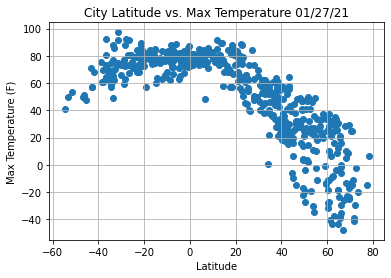

In [44]:
# Create Chart
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature 01/27/21")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsTemperature.png")

# Show plot
plt.show()

This plot reflects the maximum current temperature (in Fahrenheit) at different latitudes. The temperatures are higher in the latitudes below 40 degrees north of the equator. At higher latitudes, there are some extremely cold temperatures, given that it is currently winter in the northern hemisphere and latitude of 60N is very far north. The southern hemisphere is currently in summer, so the max temperature is not lower than 40 degrees Fahrenheit. The weather is consistently hottest at the equator.

## Latitude vs. Humidity Plot

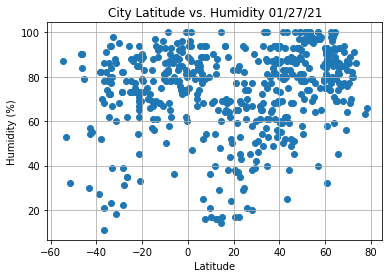

In [45]:
# Create Chart
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 01/27/21")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsHumidity.png")

# Show plot
plt.show()

This plot reflects the humidity of the cities in the sample by their latitude. There seems to be a generally high concentration of humidity across latitudes, except for those more than 40 degrees south of the equator.

## Latitude vs. Cloudiness Plot

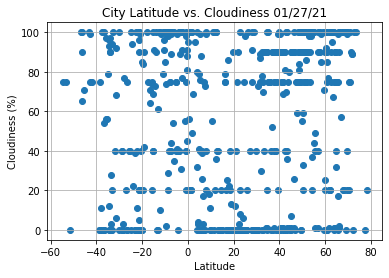

In [46]:
# Create Chart
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness 01/27/21")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsCloudiness.png")

# Show plot
plt.show()

This plot reflects the cloudiness compared with the latitude of the city. There do not appear to be any cities on the equator that were not cloudy on 1/27/21.

## Latitude vs. Wind Speed Plot

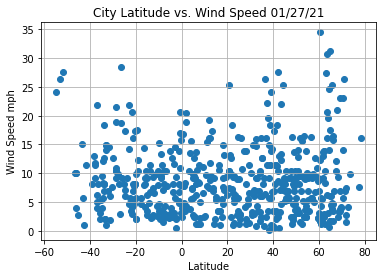

In [47]:
# Create Chart
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed 01/27/21")
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsWindSpeed.png")

# Show plot
plt.show()

This plot reflects latitude compared with wind speed.  The wind speeds generally fall in similar ranges, though higher wind speeds are more prevalent in the northern hemisphere as of 1/27/21. The highest wind speeds observed are near the Arctic Circle.

## Linear Regression

In [50]:
#Split dataframe
northern_weather_df=weather_df.loc[weather_df['Lat']>=0]
southern_weather_df=weather_df.loc[weather_df['Lat']<0]


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,1.760000e+02
mean,-20.140430,21.584507,74.214489,74.244318,57.500000,8.411193,1.611782e+09
std,13.322811,92.443703,9.825744,17.931695,38.271063,5.598993,6.954448e+01
min,-54.800000,-175.200000,41.000000,11.000000,0.000000,0.400000,1.611782e+09
25%,-31.459350,-55.054075,68.847500,68.000000,20.000000,4.022500,1.611782e+09
50%,-20.214850,18.983900,76.515000,78.000000,72.000000,7.985000,1.611782e+09
75%,-8.464800,114.783325,80.600000,87.000000,96.250000,10.550000,1.611782e+09
max,-0.358200,175.700000,97.360000,100.000000,100.000000,28.520000,1.611782e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8457680191923913.


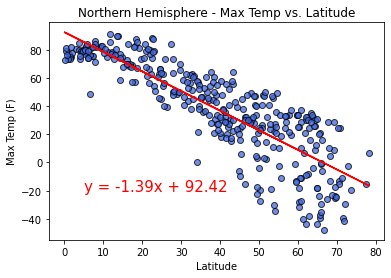

In [63]:
#Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_weather_df['Lat'], northern_weather_df['Max Temp'])
regress_values = northern_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graph datapoints with regression line

plt.scatter(northern_weather_df['Lat'], northern_weather_df['Max Temp'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
plt.plot(northern_weather_df['Lat'],regress_values,"red")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
r_value = st.pearsonr(northern_weather_df['Lat'],northern_weather_df['Max Temp'])

plt.savefig("LatitudeVsTempNorth.png")
print(f'The r-value is: {r_value[0]}.')

The regression indicates that there is a strong negative relationship between the latitude and the temperature in the Northern Hemisphere.  As the latitude increases, the temperature is colder.  This makes sense as this would imply that the temperature is colder the further the city is from the equator (and the closer the city is to the North Pole).

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5118663600496295.


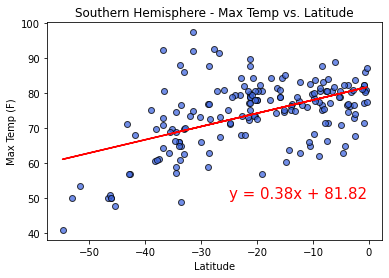

In [70]:
#Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_weather_df['Lat'], southern_weather_df['Max Temp'])
regress_values= southern_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graph datapoints with regression line

plt.scatter(southern_weather_df['Lat'], southern_weather_df['Max Temp'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
plt.plot(southern_weather_df['Lat'],regress_values,"red")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
r_value = st.pearsonr(southern_weather_df['Lat'],southern_weather_df['Max Temp'])
plt.savefig("LatitudeVsTempSouth.png")
print(f'The r-value is: {r_value[0]}.')

This regression suggests a moderate positive relationship between the latitude and the temperature.  This makes sense as the latitude increases from the South Pole to the Equator, and the temperature generally increases from the South Pole to the Equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.30492507762570753.


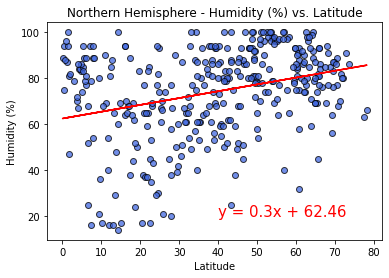

In [76]:
#Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_weather_df['Lat'], northern_weather_df['Humidity'])
regress_values = northern_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graph datapoints with regression line

plt.scatter(northern_weather_df['Lat'], northern_weather_df['Humidity'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
plt.plot(northern_weather_df['Lat'],regress_values,"red")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
r_value = st.pearsonr(northern_weather_df['Lat'],northern_weather_df['Humidity'])

plt.savefig("LatitudeVsHumidityNorth.png")
print(f'The r-value is: {r_value[0]}.')

There appears to be a weak positive relationship between latitude and humidity in the Northern Hemisphere. There appears to currently be a fair amount of humidity, though humidity appears to be generally lower at latitudes below 30 degrees North.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.29541239433230626.


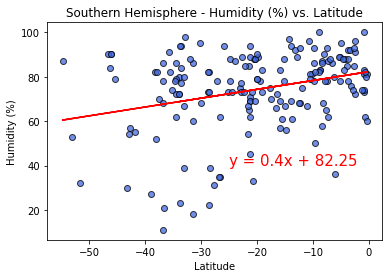

In [77]:
#Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_weather_df['Lat'], southern_weather_df['Humidity'])
regress_values= southern_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graph datapoints with regression line

plt.scatter(southern_weather_df['Lat'], southern_weather_df['Humidity'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
plt.plot(southern_weather_df['Lat'],regress_values,"red")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
r_value = st.pearsonr(southern_weather_df['Lat'],southern_weather_df['Humidity'])
plt.savefig("LatitudeVsHumiditySouth.png")
print(f'The r-value is: {r_value[0]}.')

There appears to be a weak positive relationship between latitude and humidity in the Southern Hemisphere. The latitude appears lowest below -20 degrees south.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2768781658624222.


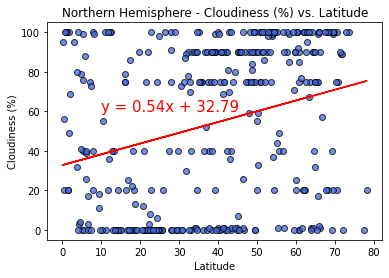

In [80]:
#Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_weather_df['Lat'], northern_weather_df['Cloudiness'])
regress_values = northern_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graph datapoints with regression line

plt.scatter(northern_weather_df['Lat'], northern_weather_df['Cloudiness'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
plt.plot(northern_weather_df['Lat'],regress_values,"red")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
r_value = st.pearsonr(northern_weather_df['Lat'],northern_weather_df['Cloudiness'])

plt.savefig("LatitudeVsCloudinessNorth.png")
print(f'The r-value is: {r_value[0]}.')

There appears to be a very weak linear relationship between latitude and cloudiness in the Northern Hemisphere. There are few oservations at around 50% cloudiness across latitudes. Additionally, there are a number of cities with no clouds, and with cloudy skies. At latitudes above 70 degrees, there are few clouds.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19782510737402037.


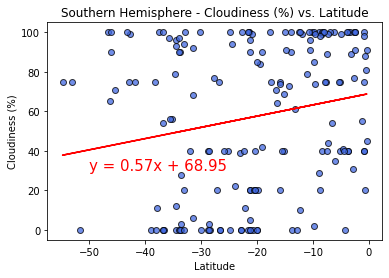

In [87]:
#Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_weather_df['Lat'], southern_weather_df['Cloudiness'])
regress_values= southern_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graph datapoints with regression line

plt.scatter(southern_weather_df['Lat'], southern_weather_df['Cloudiness'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
plt.plot(southern_weather_df['Lat'],regress_values,"red")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
r_value = st.pearsonr(southern_weather_df['Lat'],southern_weather_df['Cloudiness'])
plt.savefig("LatitudeVsCloudinessSouth.png")
print(f'The r-value is: {r_value[0]}.')

There appears to be a very weak relationship between latitude and cloudiness in the Southern Hemisphere. There are few oservations at around 50% cloudiness across latitudes. At latitudes below -50 degrees, there are few clouds.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2768781658624222.


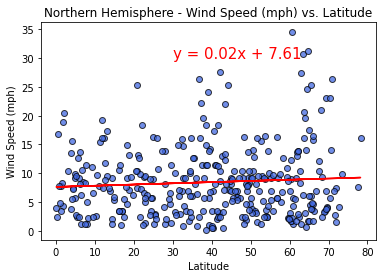

In [93]:
#Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_weather_df['Lat'], northern_weather_df['Wind Speed'])
regress_values = northern_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graph datapoints with regression line

plt.scatter(northern_weather_df['Lat'], northern_weather_df['Wind Speed'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
plt.plot(northern_weather_df['Lat'],regress_values,"red")
plt.annotate(line_eq,(30,30),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
r_value = st.pearsonr(northern_weather_df['Lat'],northern_weather_df['Cloudiness'])

plt.savefig("LatitudeVsWindSpeedNorth.png")
print(f'The r-value is: {r_value[0]}.')

There appears to be a very weak positive linear relationship between wind speed and latitude in the Northern Hemisphere. Wind speeds are generally low as of 1/27/21 in the Northern Hemisphere, with a few outliers closer to the North Pole.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.26035138852243805.


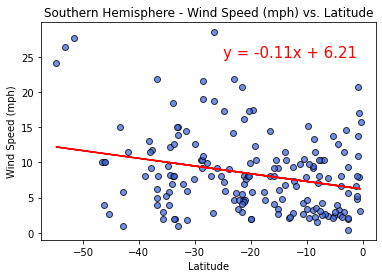

In [92]:
#Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_weather_df['Lat'], southern_weather_df['Wind Speed'])
regress_values= southern_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graph datapoints with regression line

plt.scatter(southern_weather_df['Lat'], southern_weather_df['Wind Speed'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
plt.plot(southern_weather_df['Lat'],regress_values,"red")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
r_value = st.pearsonr(southern_weather_df['Lat'],southern_weather_df['Wind Speed'])
plt.savefig("LatitudeVsWindspeedSouth.png")
print(f'The r-value is: {r_value[0]}.')

There appears to be a very weak negative linear relationship between wind speed and latitue in the Southern Hemisphere. Wind speeds are generally low.  The highest wind speeds were observed at around 27 degrees south, and closer to the South Pole.